# **Debugging Notebook**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

## Preparing the data & Label generation

In [16]:
df = pd.read_csv("data/final-alpha-model-data.csv", index_col=0, parse_dates=True)

In [17]:
df = df.drop(columns=["close", "high", "low", "open"])

In [33]:
df.describe()

,volume,log_returns,min_10k_count,min_100_count,new_non_zero_count,count,active_more_1y_percent,block_count,hash_rate_mean,inflation_rate,...,loss_sum,liveliness,nvt,nvts,reserve_risk,rhodl_ratio,stock_to_flow_deflection,utxo_created_count,velocity,target
count,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,2.630300e+04,26303.000000,26303.000000,2.630300e+04,26303.000000,...,2.630300e+04,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000,26303.000000
mean,16161.440763,0.000031,96.952895,16052.589438,18048.558301,8.384399e+08,0.599975,6.047903,1.656370e+20,0.020090,...,4.633108e+06,0.611206,983.329575,652.391810,0.000064,3824.378163,0.552794,35142.088127,0.002113,0.014713
std,16285.187641,0.008099,10.231643,131.985041,7319.726400,1.395178e+08,0.042823,2.507760,8.572552e+19,0.006782,...,3.032128e+06,0.007489,962.633882,327.309166,0.000037,3914.586509,0.288643,13015.254748,0.003102,0.999911
min,63.932000,-0.207136,79.000000,15681.000000,0.000000,5.960800e+08,0.535026,0.000000,1.024787e+19,0.006961,...,0.000000e+00,0.595325,7.236668,125.038993,0.000017,191.510043,0.143710,0.000000,0.000000,-1.000000
25%,6743.777000,-0.002876,87.000000,15962.000000,12792.500000,7.145218e+08,0.557651,4.000000,1.050992e+20,0.016778,...,2.044817e+06,0.606202,485.093816,444.500951,0.000037,942.873902,0.325601,26259.500000,0.000790,-1.000000
50%,11225.281000,0.000076,98.000000,16058.000000,16998.000000,8.485432e+08,0.595282,6.000000,1.497504e+20,0.018138,...,4.443477e+06,0.613633,819.070792,593.979058,0.000052,1609.183613,0.511636,33724.000000,0.001216,1.000000
75%,19580.698000,0.003050,106.000000,16137.000000,22412.000000,9.599450e+08,0.634125,8.000000,2.083469e+20,0.019746,...,7.294416e+06,0.617483,1259.360207,877.373775,0.000084,6772.014481,0.793889,42942.500000,0.002056,1.000000
max,312462.168000,0.150751,121.000000,16684.000000,60091.000000,1.070791e+09,0.669644,21.000000,1.775920e+21,0.047824,...,1.070885e+07,0.623262,60011.713759,1692.214391,0.000181,15286.739512,1.260404,111537.000000,0.138185,1.000000


In [18]:
df.isnull().sum()

volume                               0
log_returns                          0
min_10k_count                        0
min_100_count                        0
new_non_zero_count                   0
count                                0
active_more_1y_percent               0
block_count                          0
hash_rate_mean                       0
inflation_rate                       0
revenue_from_fees                    0
balance_exchanges                    0
transfers_volume_to_exchanges_sum    0
net_realized_profit_loss             0
net_unrealized_profit_loss           0
realized_loss                        0
realized_profit                      0
sopr                                 0
loss_sum                             0
liveliness                           0
nvt                                  0
nvts                                 0
reserve_risk                         0
rhodl_ratio                          0
stock_to_flow_deflection             0
utxo_created_count       

In [19]:
print(df.describe())

              volume   log_returns  min_10k_count  min_100_count  \
count   26303.000000  26303.000000   26303.000000   26303.000000   
mean    16161.440763      0.000031      96.952895   16052.589438   
std     16285.187641      0.008099      10.231643     131.985041   
min        63.932000     -0.207136      79.000000   15681.000000   
25%      6743.777000     -0.002876      87.000000   15962.000000   
50%     11225.281000      0.000076      98.000000   16058.000000   
75%     19580.698000      0.003050     106.000000   16137.000000   
max    312462.168000      0.150751     121.000000   16684.000000   

       new_non_zero_count         count  active_more_1y_percent   block_count  \
count        26303.000000  2.630300e+04            26303.000000  26303.000000   
mean         18048.558301  8.384399e+08                0.599975      6.047903   
std           7319.726400  1.395178e+08                0.042823      2.507760   
min              0.000000  5.960800e+08                0.535026

In [20]:
Y = pd.DataFrame(list(np.where(df["log_returns"] >0, 1, -1)))

In [21]:
Y

,0
0,-1
1,1
2,-1
3,1
4,-1
...,...
26298,1
26299,1
26300,-1
26301,-1


In [27]:
df["target"] = np.where(df["log_returns"] > 0, 1, -1)

## Check for homoegenous

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_distributions(df, target_col='target'):
    features = [col for col in df.columns if col != target_col]
    
    for feature in features:
        class_0 = df[df[target_col] == -1][feature]
        class_1 = df[df[target_col] == 1][feature]

        # Skip features with no variance
        if class_0.nunique() <= 1 or class_1.nunique() <= 1:
            print(f"Skipping '{feature}' due to low variance in one of the classes.")
            continue

        plt.figure(figsize=(10, 5))
        sns.kdeplot(data=class_0, fill=True, label='Class -1 (Price decrease in next interval)', alpha=0.5)
        sns.kdeplot(data=class_1, fill=True, label='Class 1 (Price increases in next interval)', alpha=0.5)

        plt.title(f'Distribution of "{feature}" by Class')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


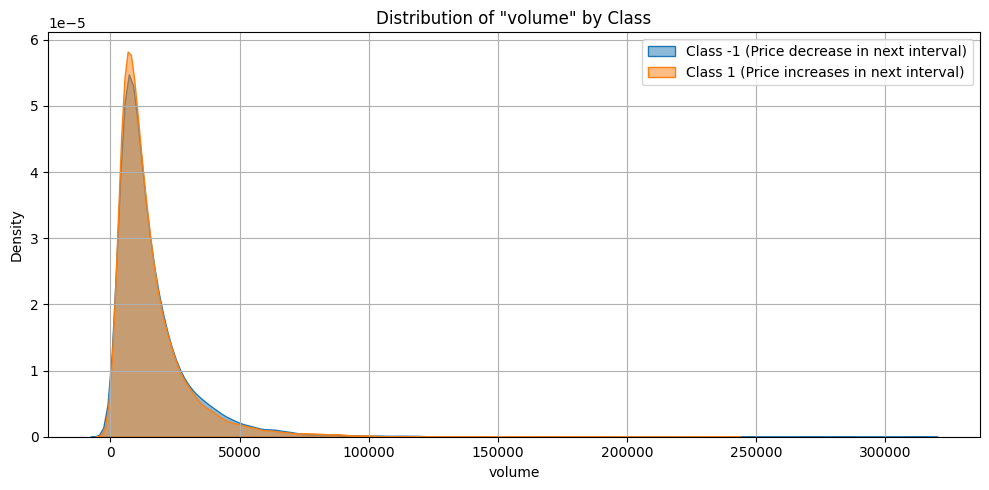

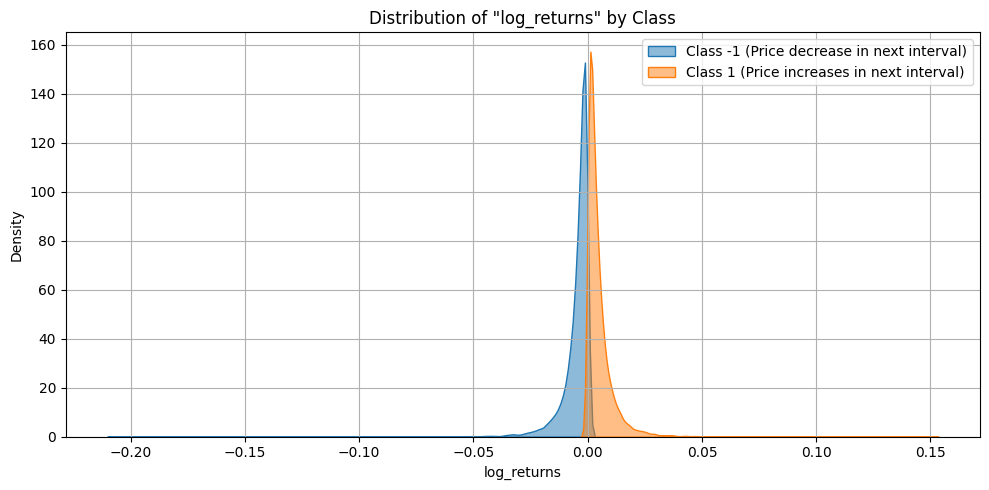

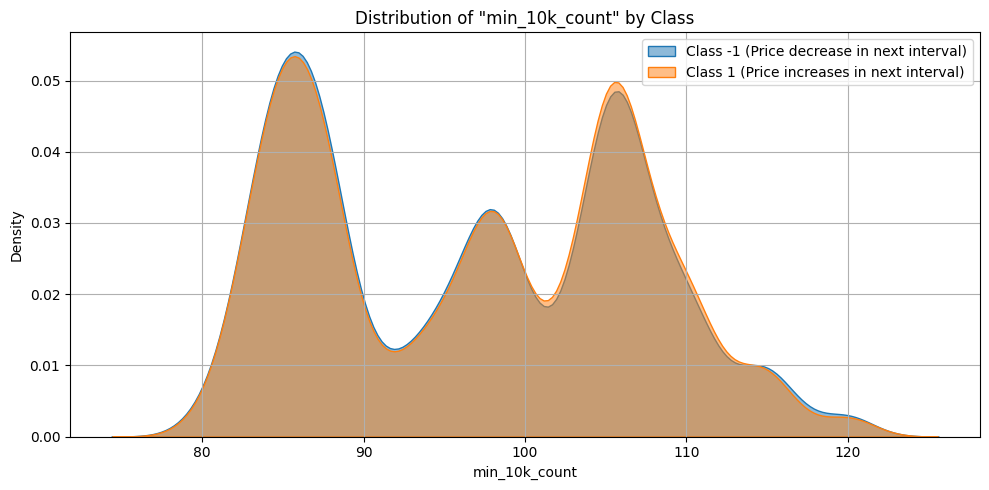

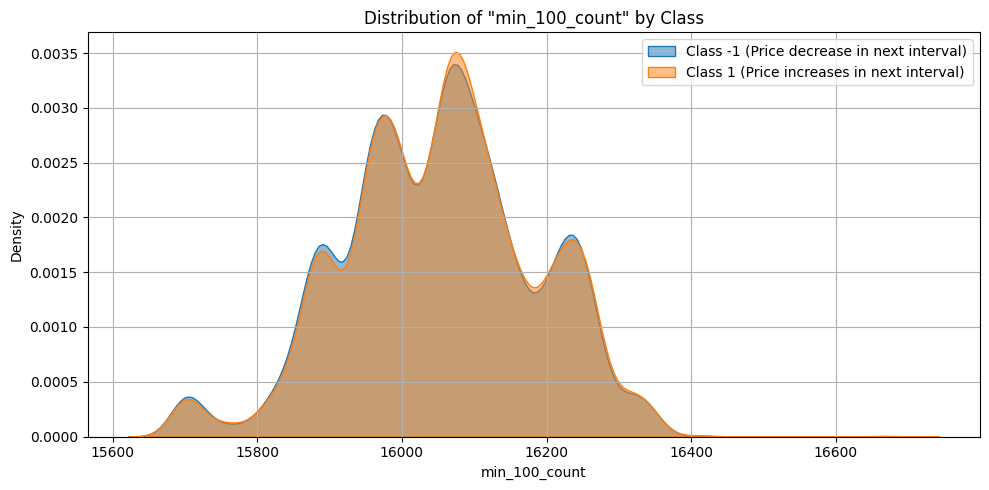

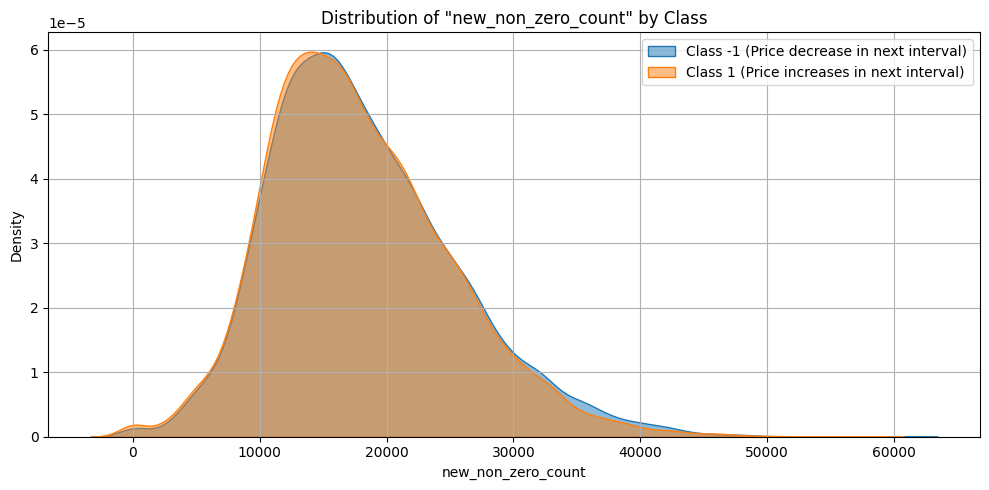

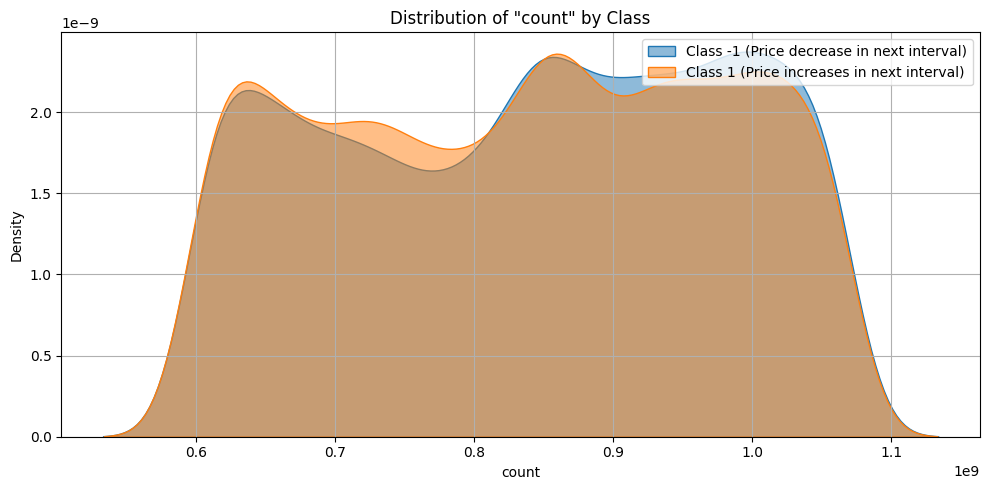

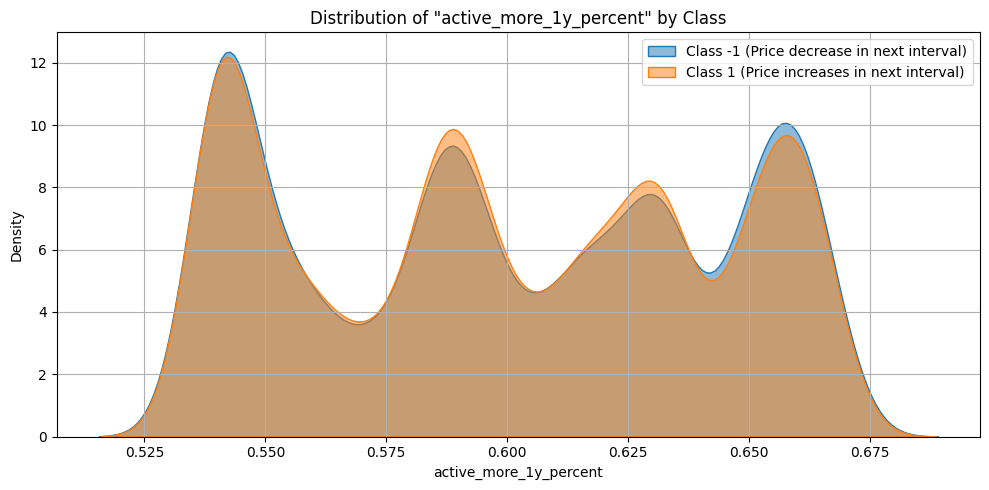

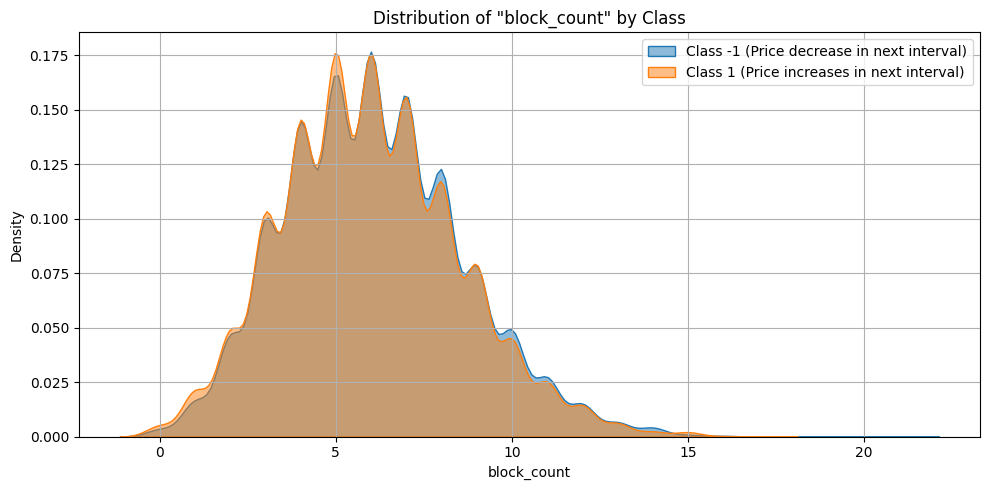

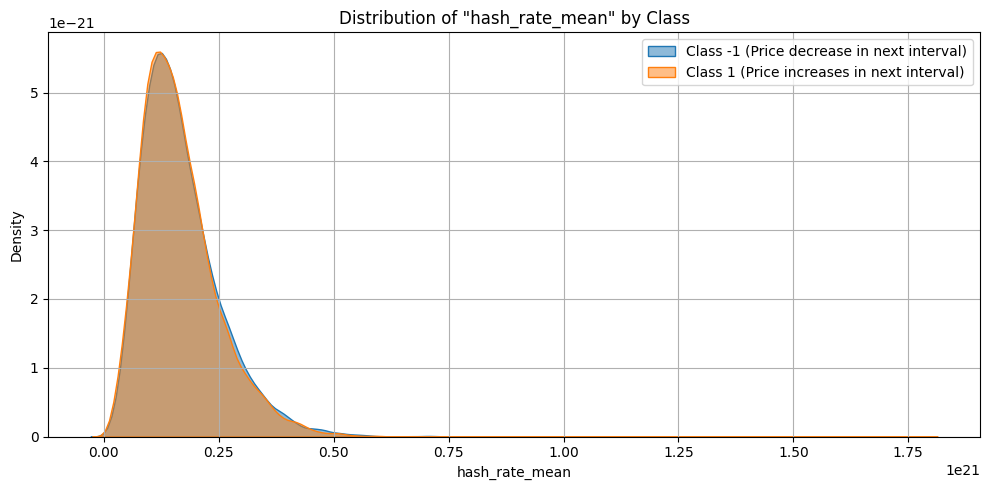

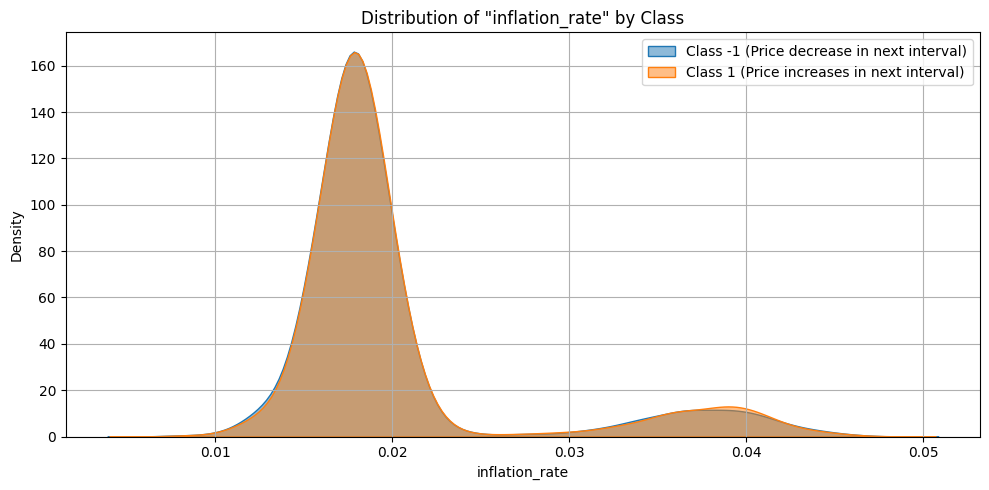

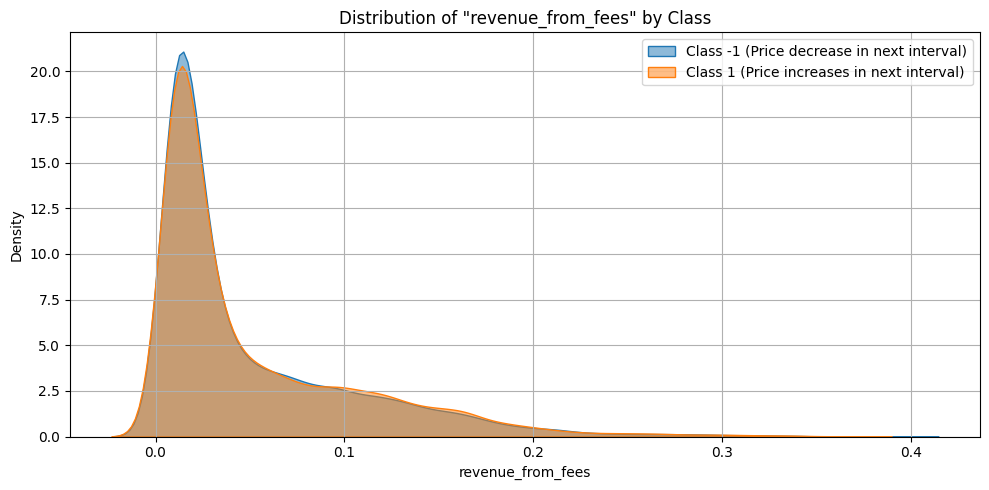

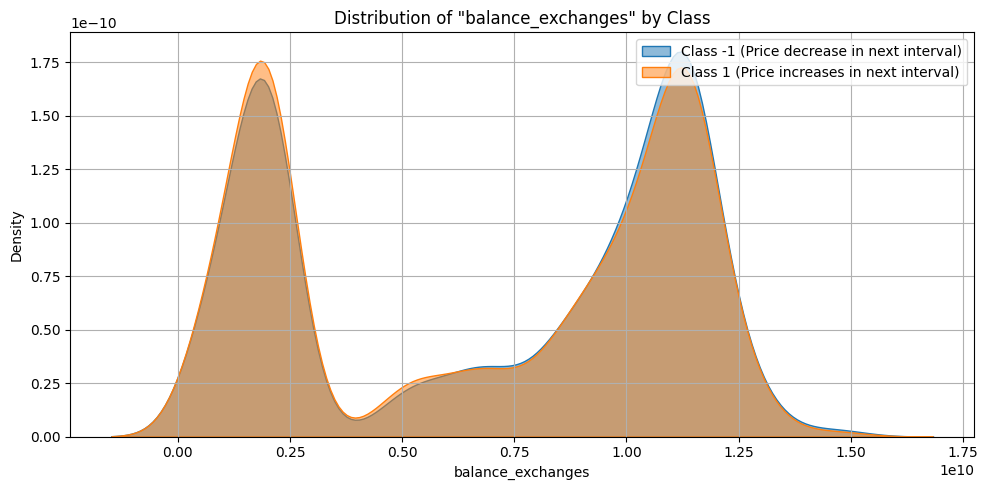

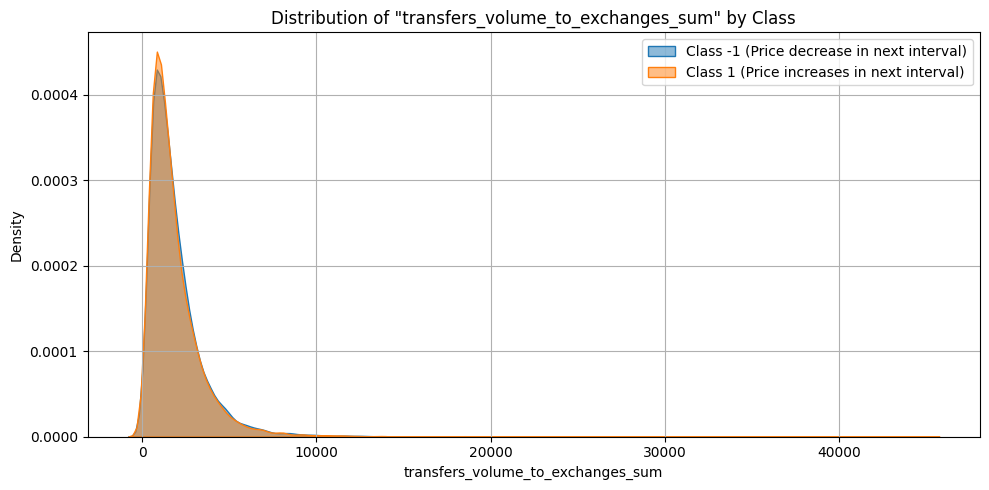

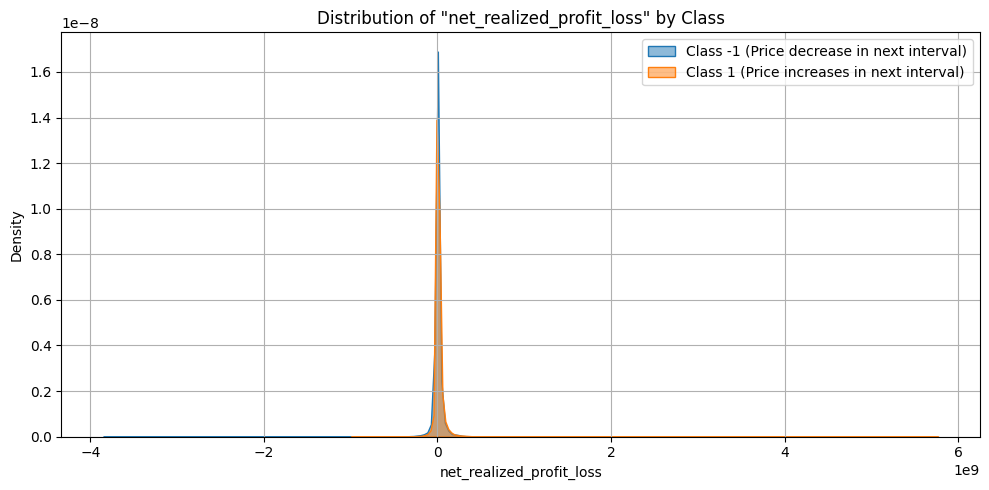

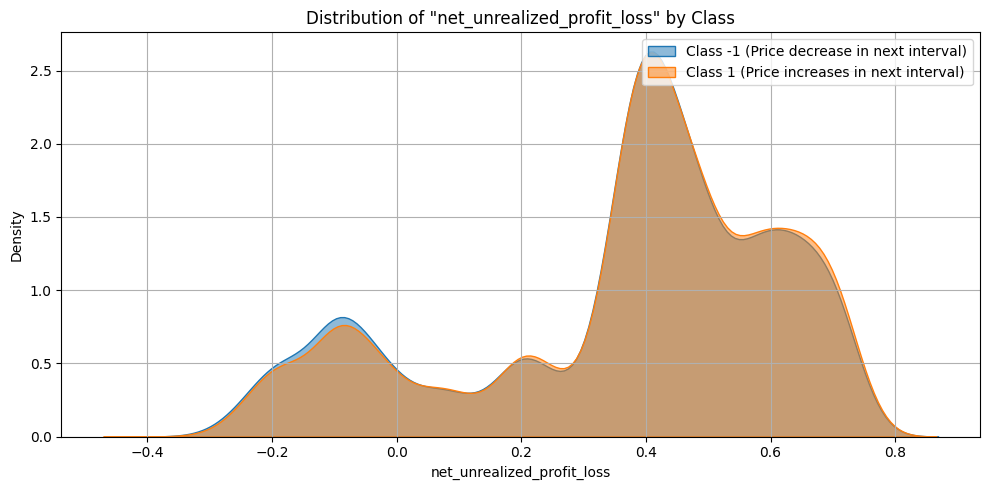

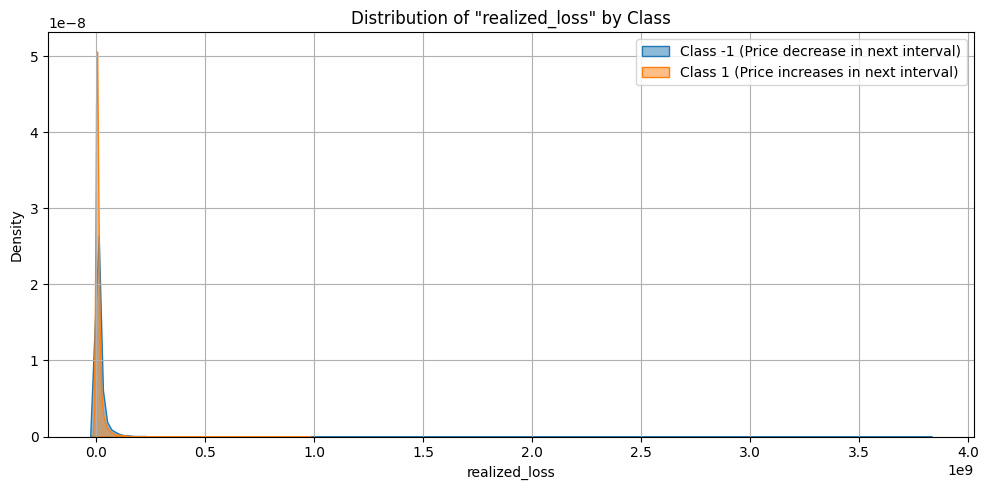

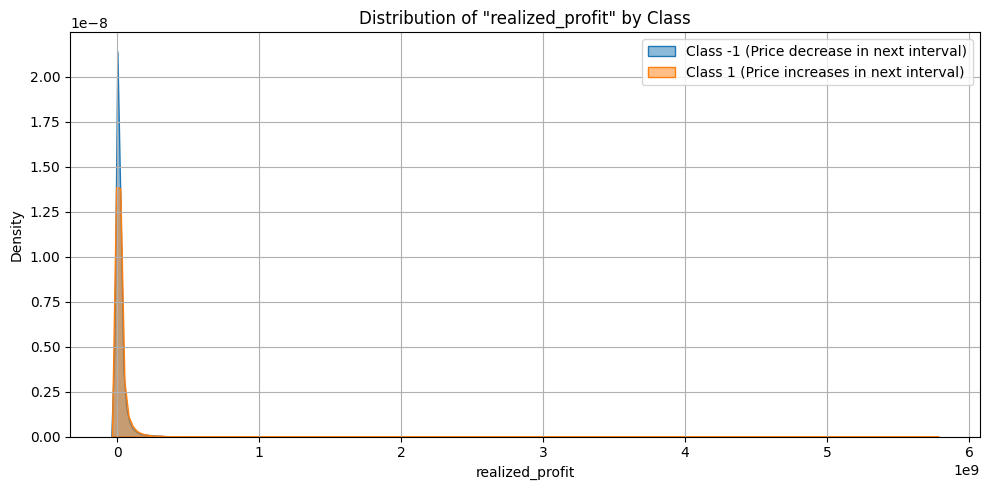

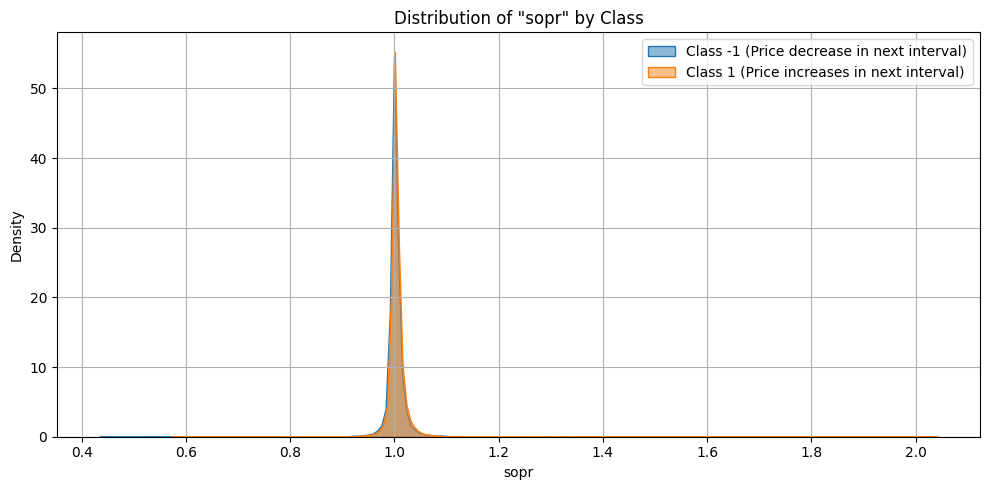

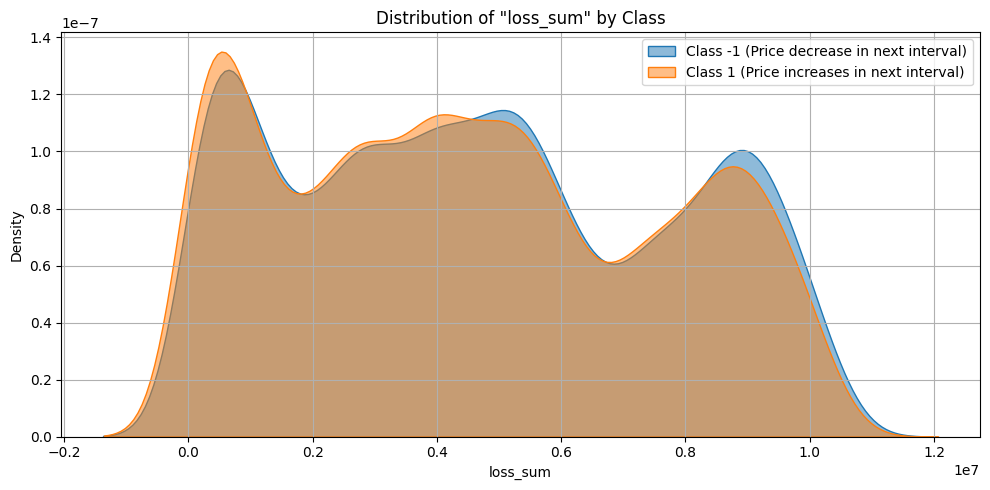

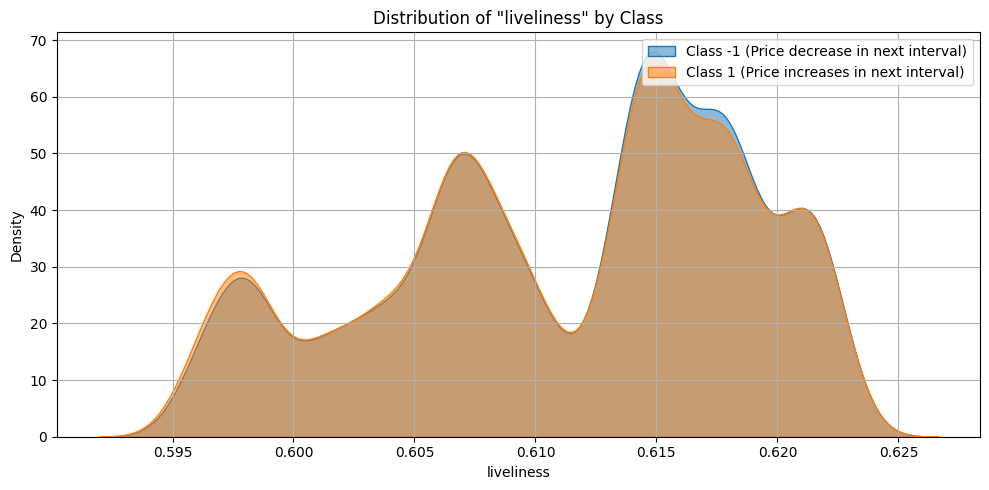

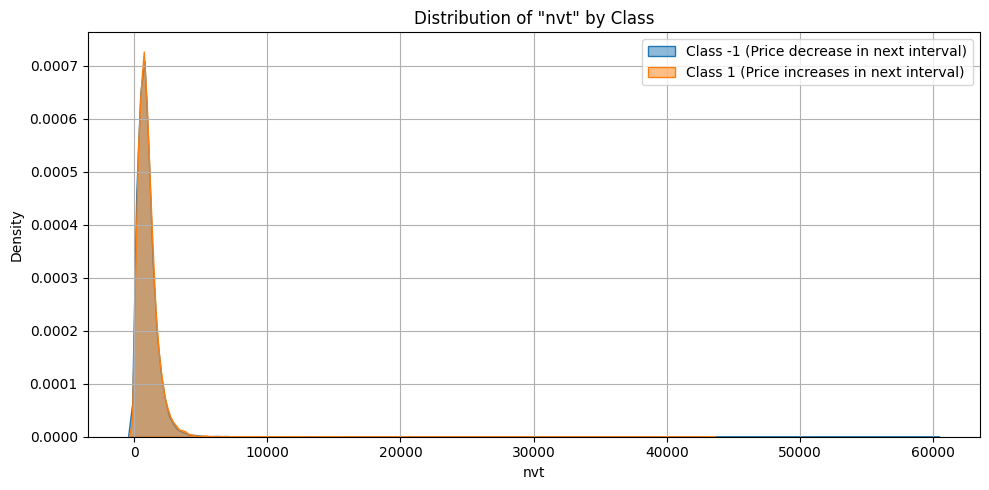

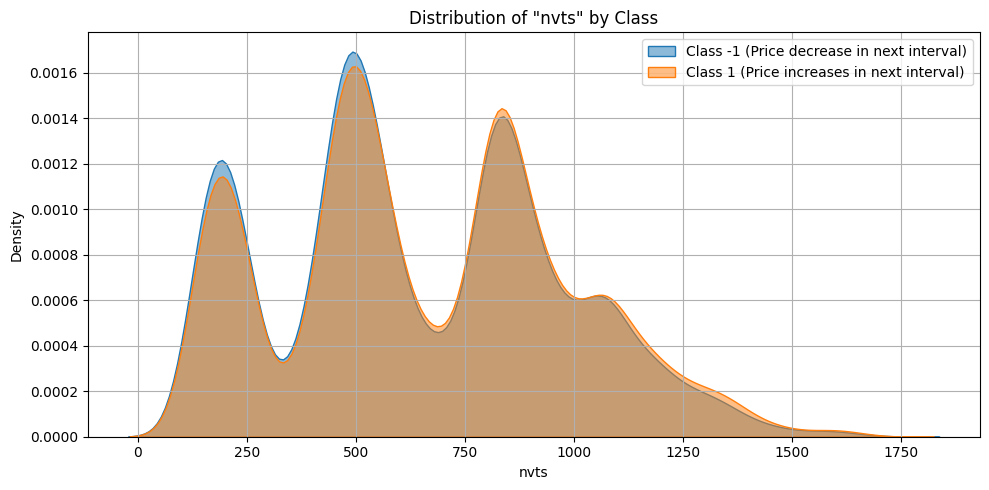

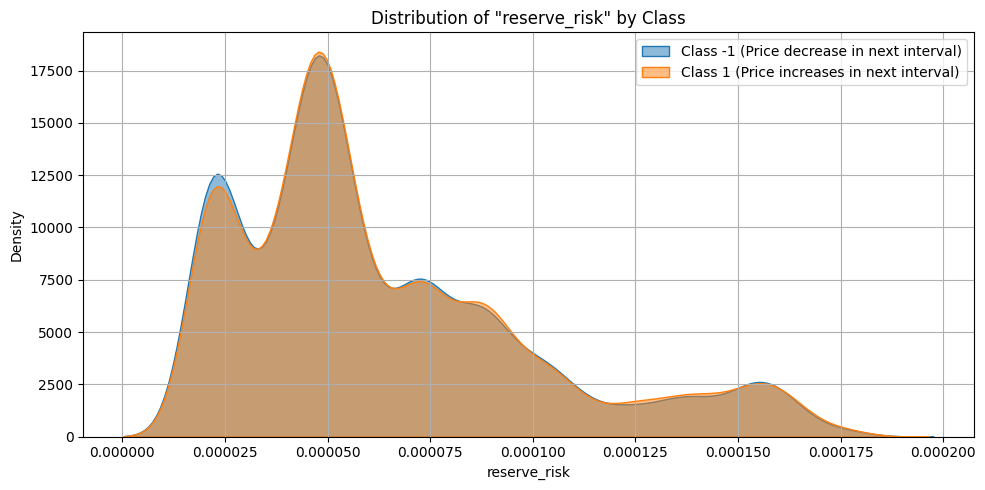

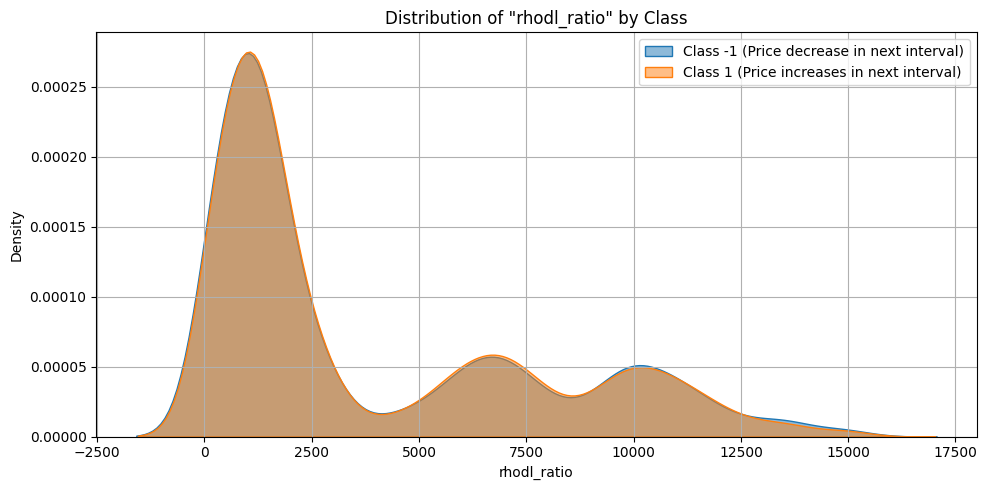

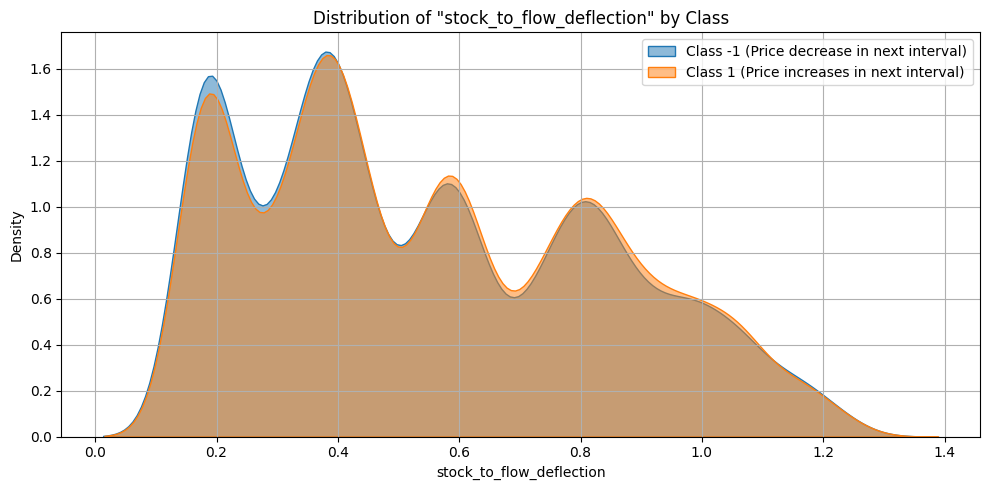

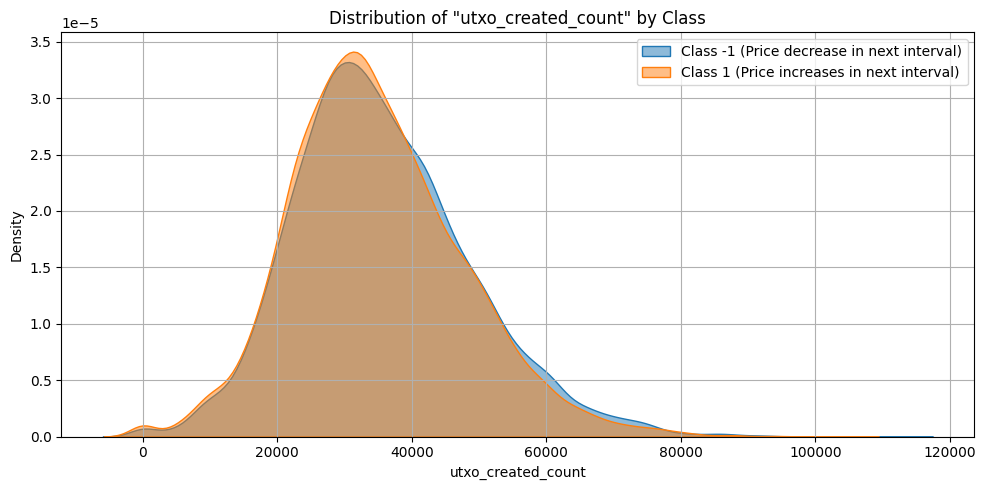

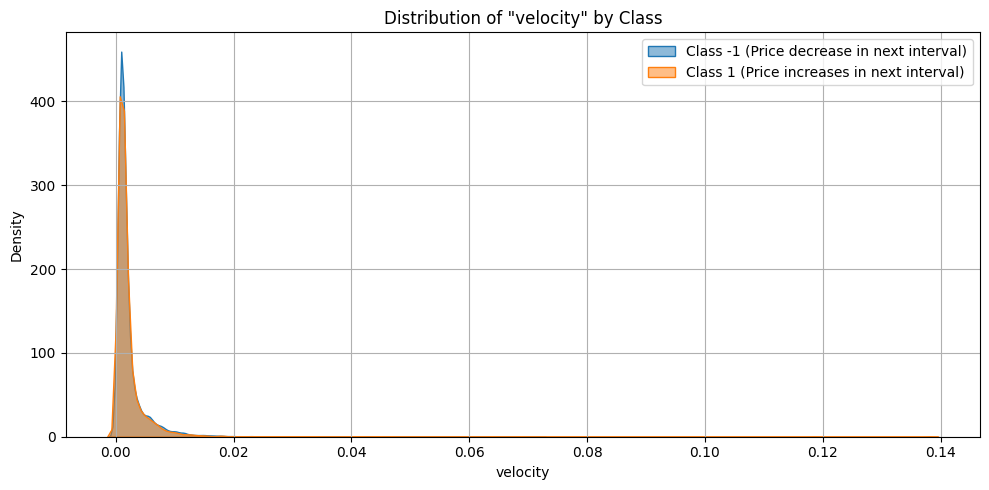

In [31]:
plot_feature_distributions(df, target_col='target')

### **Conclusion**
Most of the features are homogeneous. So the tree-based models may be beneficial.

## Changes of features over time

In [38]:
def plot_features_over_index(df, features, n_cols=2, figsize=(14, 4)):
    n_rows = (len(features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(figsize[0], figsize[1]*n_rows), sharex=True)
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        axes[i].plot(df.index, df[feature], label=feature)
        axes[i].set_title(feature)
        axes[i].set_xlabel("Row Index")
        axes[i].set_ylabel("Value")
        axes[i].grid(True)
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()


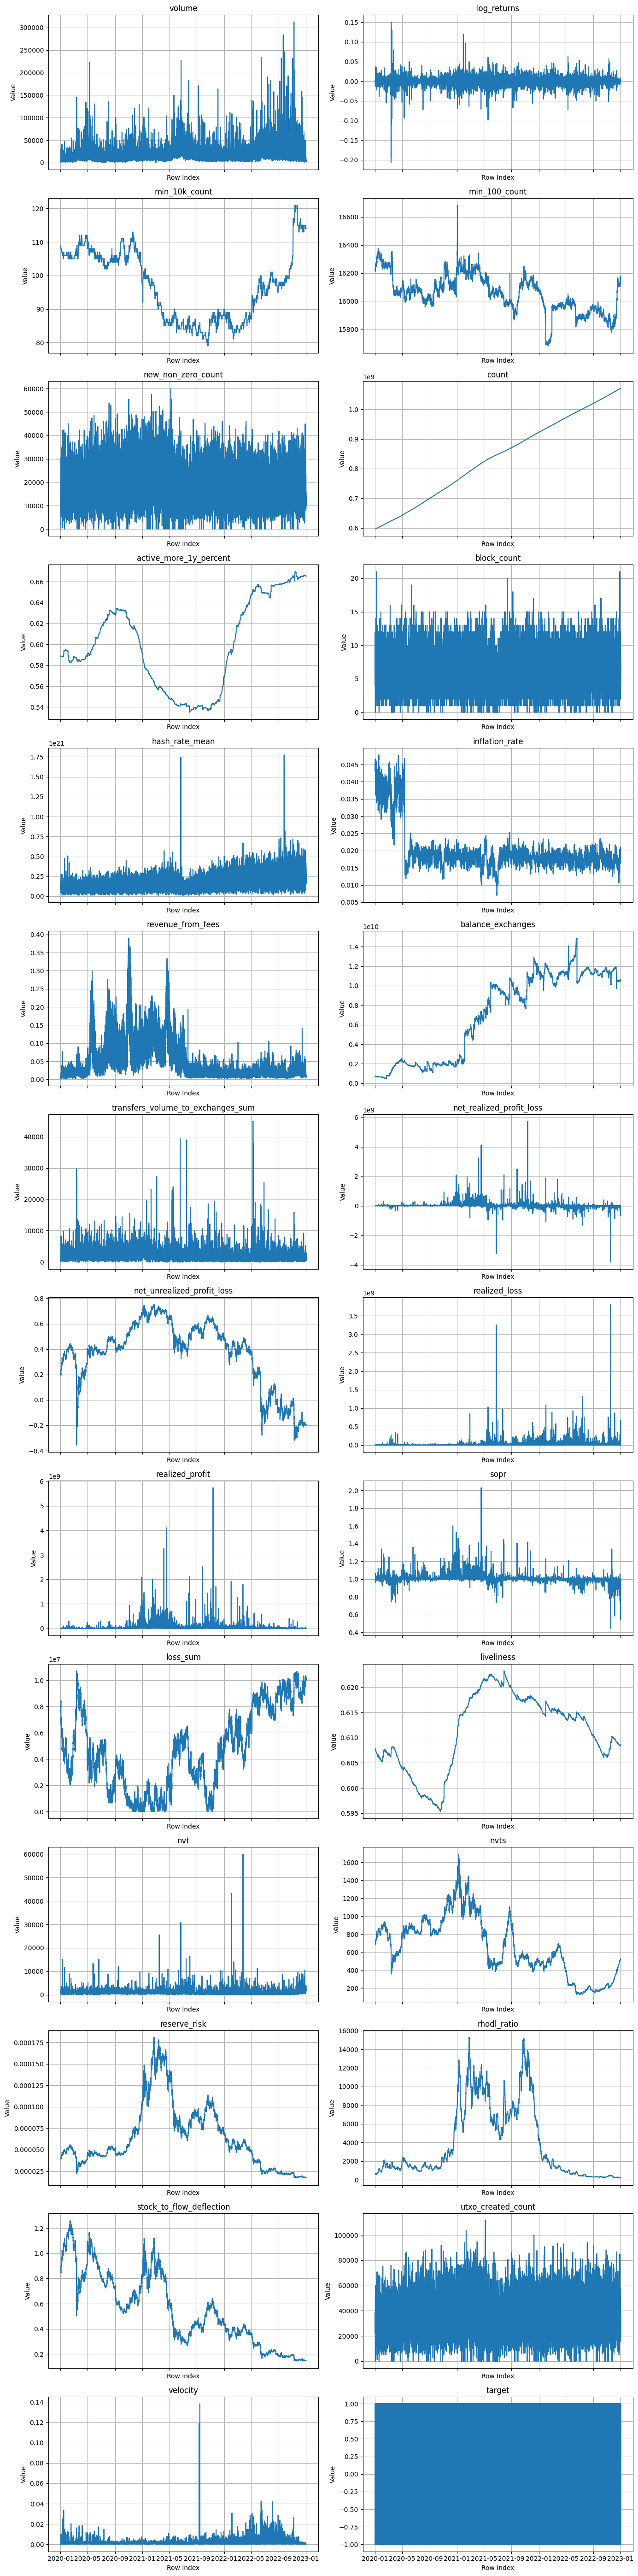

In [40]:
plot_features_over_index(df, df.columns)